{994: 2526, 354: 1716, 1604: 5757, 1512: 5523, 1288: 4015, 1481: 5985, 714: 2137, 500: 1585, 141: 395, 143: 473, 2000: 8099, 628: 2136, 148: 250, 885: 5216, 150: 481, 24: 24, 404: 1348, 218: 811, 125: 137, 350: 1314, 1908: 6664}


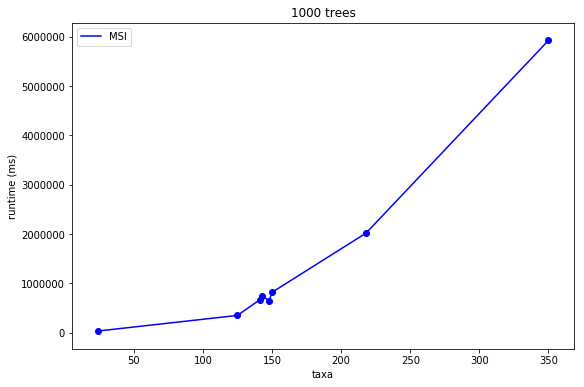

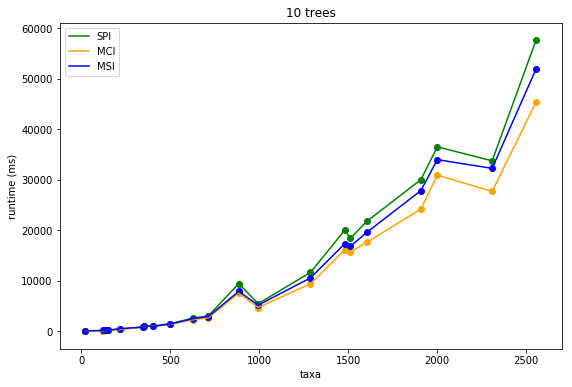

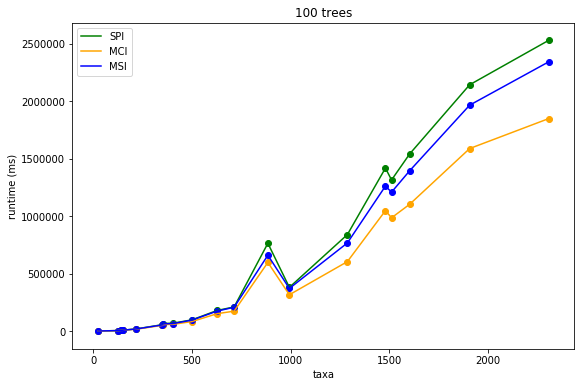

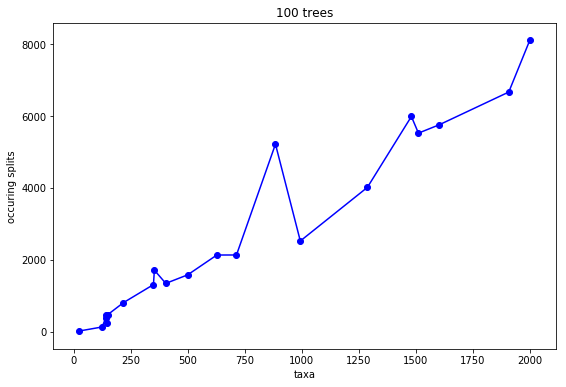

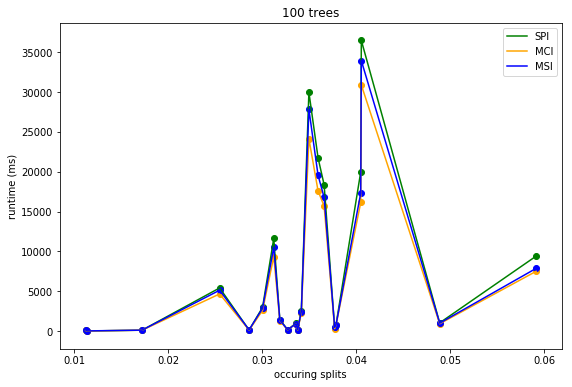

In [18]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
color_dict = {}
color_dict['MSI'] = "blue"
color_dict['SPI'] = "green"
color_dict['MCI'] = "orange"

csv_df = pd.read_csv('../benchmark/robin_full.csv', sep=',', header=None)
#values[10][24]['MSI']
values = {}
for row in csv_df.iterrows():
    instance_name = row[1][0].split('/')[-1]
    trees = int(instance_name.split('-')[0])
    taxa = int(instance_name.split('-')[1])
    metric = row[1][1]
    runtime = float(row[1][2])
    if not (trees in values):
        values[trees] = {}
    if not (metric in values[trees]):
        values[trees][metric] = {}
    values[trees][metric][taxa] = runtime;
    
unique_df = pd.read_csv('../benchmark/unique', delim_whitespace=True, header=None)
uniques = {}
for row in unique_df.iterrows():
    uniques[int(row[1][0])] = int(row[1][1])
print(uniques)

#separate set of plots for different tree set sizes
plt.rcParams["figure.figsize"] = (9, 6)
for trees in values:
    plt.title(str(trees) + ' trees')
    plt.xlabel('taxa')
    plt.ylabel('runtime (ms)')
    #separate line per metric
    for metric, results in values[trees].items():
        x_values = [taxa for taxa, runtime in results.items()]
        y_values = [runtime for taxa, runtime in results.items()]
        sort_index = np.argsort(x_values)
        x_values = [x_values[sort_index[i]] for i in range(len(sort_index))]
        y_values = [y_values[sort_index[i]] for i in range(len(sort_index))]
        plt.plot(x_values ,y_values, label = metric, color = color_dict[metric])
        plt.scatter(x_values, y_values, color = color_dict[metric])
    plt.legend()
    plt.savefig('output/metric_runtimes_' + str(trees) + "_trees" )
    plt.show()
    
plt.title(str(trees) + ' trees')
plt.xlabel('taxa')
plt.ylabel('occuring splits')
results = values[10]['MSI']
x_values = []
y_values = []
for taxa, runtime in results.items():
    if taxa in uniques:
        x_values.append(taxa)
        y_values.append(uniques[taxa])
sort_index = np.argsort(x_values)
x_values = [x_values[sort_index[i]] for i in range(len(sort_index))]
y_values = [y_values[sort_index[i]] for i in range(len(sort_index))]
plt.plot(x_values ,y_values, label = metric, color = color_dict[metric])
plt.scatter(x_values, y_values, color = color_dict[metric])
plt.savefig('output/splits_' + str(trees) + "_trees" )
plt.show()
    
    
plt.title(str(trees) + ' trees')
plt.xlabel('occuring splits')
plt.ylabel('runtime (ms)')
for metric, results in values[10].items():
    x_values = []
    y_values = []
    for taxa, runtime in results.items():
        if taxa in uniques:
            x_values.append(uniques[taxa] / (1.0*trees*(taxa-3)))
            y_values.append(runtime)
    sort_index = np.argsort(x_values)
    x_values = [x_values[sort_index[i]] for i in range(len(sort_index))]
    y_values = [y_values[sort_index[i]] for i in range(len(sort_index))]
    plt.plot(x_values ,y_values, label = metric, color = color_dict[metric])
    plt.scatter(x_values, y_values, color = color_dict[metric])
plt.legend()
plt.savefig('output/metric_runtimes_splits_' + str(trees) + "_trees" )
plt.show()
    
        